# Load Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Dataset Analysis

In [5]:
# Overall view of datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
# Missing Values
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


In [8]:
# check shape of dataframe
df.shape

(6433, 14)

In [9]:
# check data types
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [10]:
# Check categorical feature's values
for col in df.select_dtypes('object'):
  print(f"\n{col}'s Unique Values:")
  print(df[col].value_counts())
  print("*" * 30)


color's Unique Values:
yellow    5451
green      982
Name: color, dtype: int64
******************************

payment's Unique Values:
credit card    4577
cash           1812
Name: payment, dtype: int64
******************************

pickup_zone's Unique Values:
Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: pickup_zone, Length: 194, dtype: int64
******************************

dropoff_zone's Unique Values:
Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East          

# Data Preprocessing

## Data Cleaning

In [11]:
# There not much NaNs , so i will drop them all.
df.dropna(inplace=True)

In [12]:
# Check duplicate records
df.duplicated().sum()

0

In [13]:
df.info() # check dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

## Feature Engineering

## Datetime

In [14]:
# Extract day, month and year from pickup feature
df['trip_day'] = df['pickup'].dt.day
df['trip_month'] = df['pickup'].dt.month
df['trip_year'] = df['pickup'].dt.year

In [15]:
# Calculate time difference between pickup and dropoff to get trip duration
df['trip_duration'] = (df['dropoff'] - df['pickup'])
# Convert trip duration to minutes
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60
# Drop the intermediate 'trip_duration' column if needed
df.drop(columns=['trip_duration'], inplace=True)

## Tip Percentage Of Fare

In [16]:
df['tip_percent'] = (df['tip'] / df['fare']) * 100

# Exploratory Data Analysis

## Outliers

In [17]:
def outlier(col):
  plt.figure(figsize=(8, 4))
  plt.boxplot(col, meanline=True, data=df)
  plt.title(f"{col}'s Boxplot")
  plt.show()

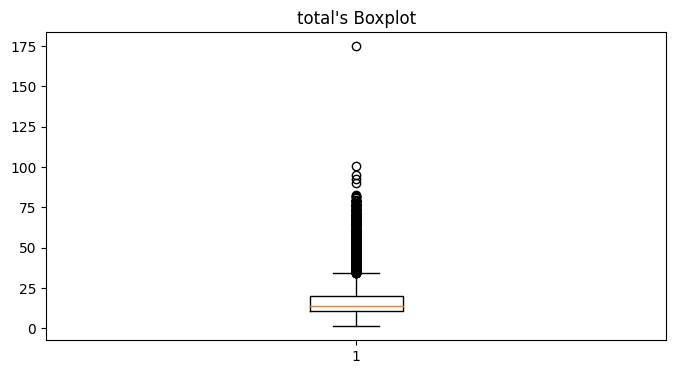

In [18]:
outlier('total')

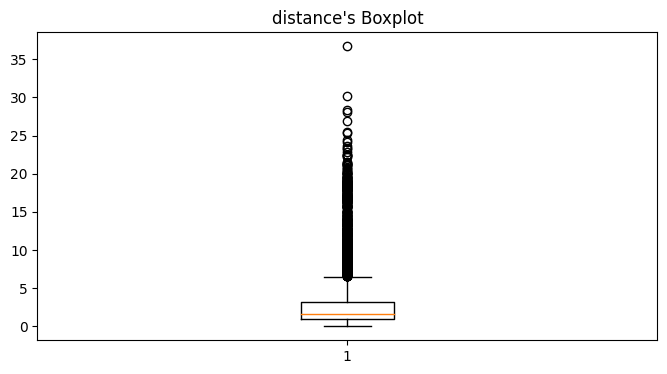

In [19]:
outlier('distance')

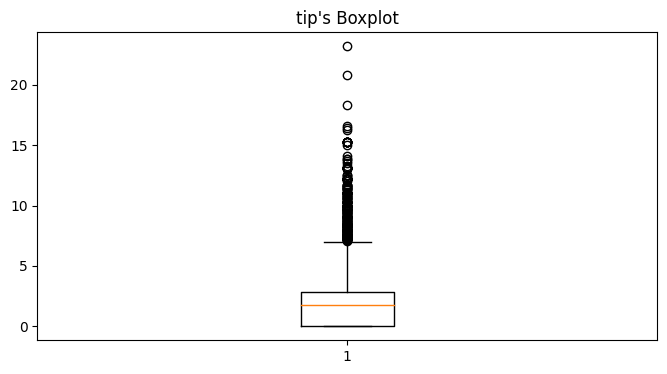

In [20]:
outlier('tip')

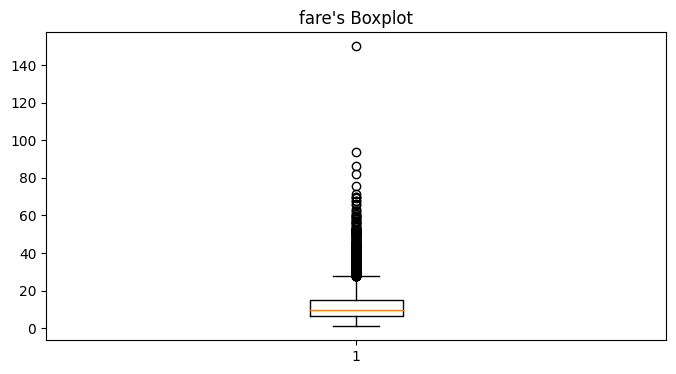

In [21]:
outlier('fare')

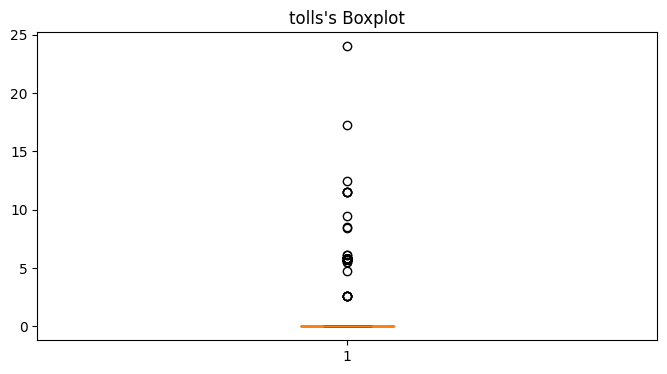

In [22]:
outlier('tolls')

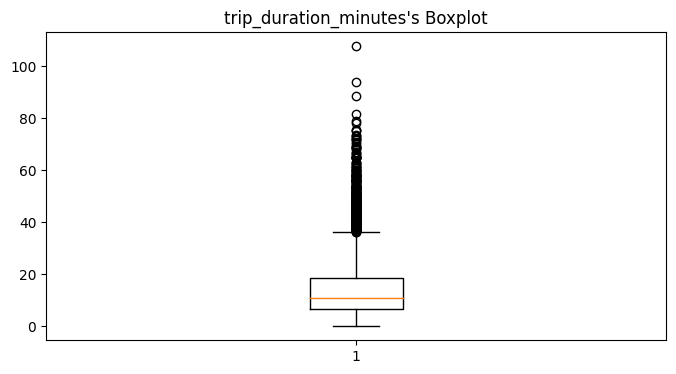

In [23]:
outlier('trip_duration_minutes')

## Distributions

In [24]:
def get_dist(col):
  # Get mean , median
  # Calculate mean and median
  mean_val = df[col].mean()
  median_val = df[col].median()

  # Plot Histograim
  sns.set_style('dark')
  plt.figure(figsize=(6, 6))
  sns.histplot(data=df, x=col, bins=80, kde=True, color='blue', edgecolor='black')

  # Plot mean and median as vertical lines
  plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='yellow', linestyle='--', label=f'Median: {median_val:.2f}')

  # Add title and x, y label
  plt.title(f"Distribution Of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.8)
  plt.legend(fontsize=10)
  # Show plot
  plt.show()

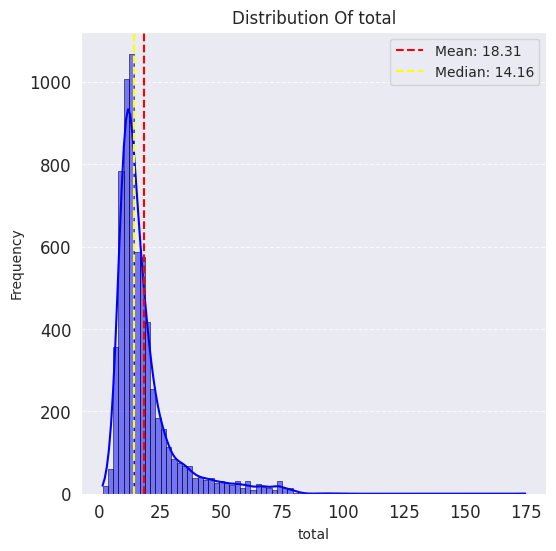

In [25]:
get_dist('total')

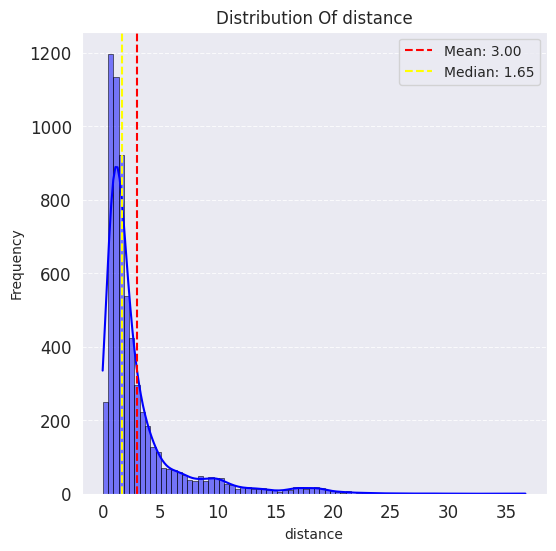

In [26]:
get_dist('distance')

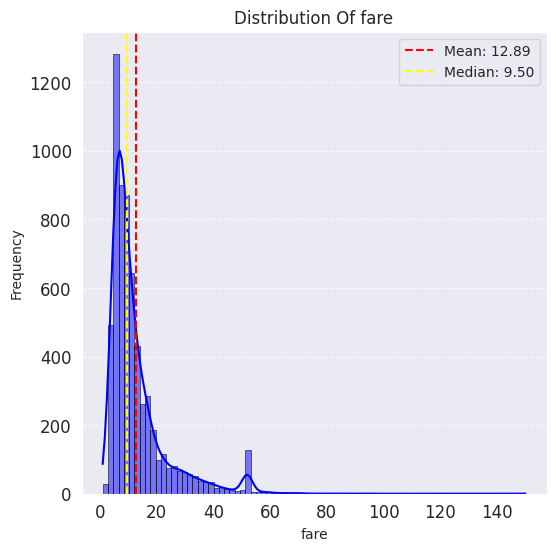

In [27]:
get_dist('fare')

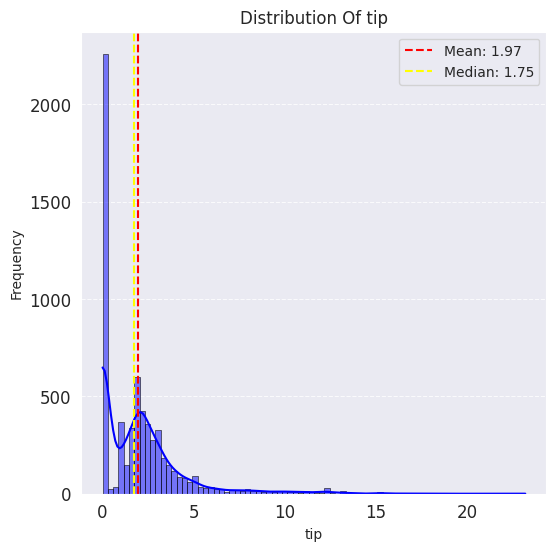

In [28]:
get_dist('tip')

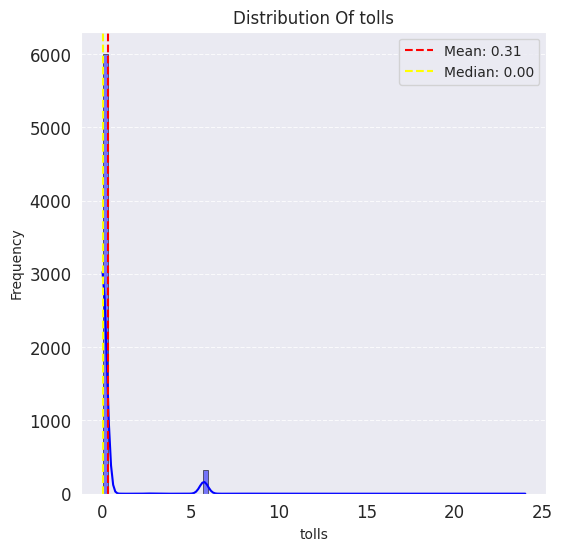

In [29]:
get_dist('tolls')

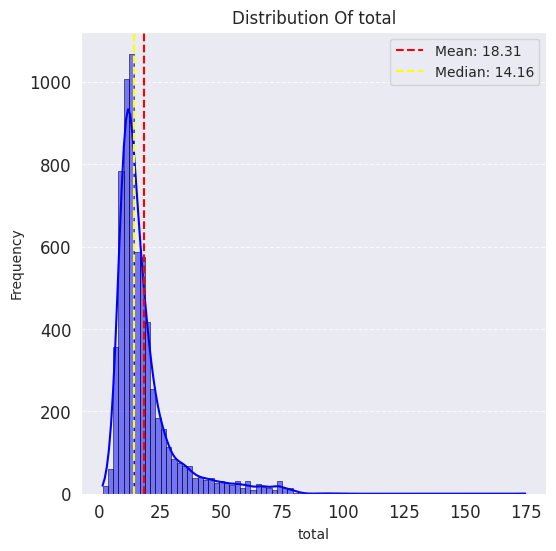

In [30]:
get_dist('total')

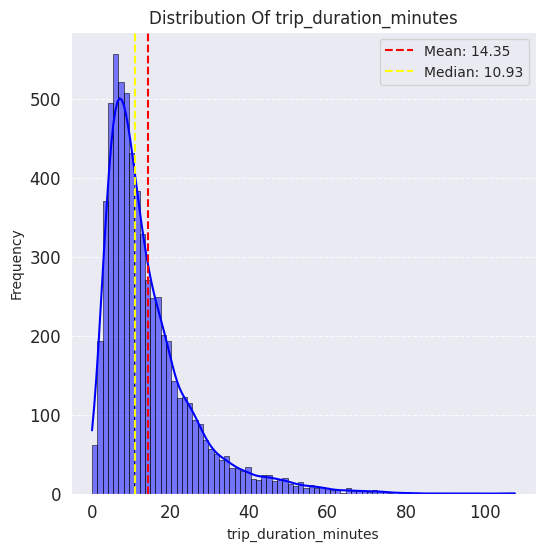

In [31]:
get_dist('trip_duration_minutes')

## Frequncy Tables

In [32]:
def frequency_table(col, sort=False, n=10):
  return df.groupby(col)[col].count().sort_values(ascending=sort).to_frame().head(n)

In [33]:
frequency_table('payment')

,payment
payment,
credit card,4546
cash,1795


In [34]:
frequency_table('color')

,color
color,
yellow,5373
green,968


In [35]:
frequency_table('pickup_zone')

,pickup_zone
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Upper East Side South,208
Clinton East,208
Midtown East,196
Upper East Side North,185
Times Sq/Theatre District,182
Union Sq,180
Lincoln Square East,176


In [36]:
frequency_table('dropoff_zone')

,dropoff_zone
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
Times Sq/Theatre District,158
Lincoln Square East,154
Clinton East,151
East Village,150


In [37]:
frequency_table('pickup_borough')

,pickup_borough
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


In [38]:
frequency_table('dropoff_borough', sort=False, n=3)

,dropoff_borough
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497


## Longest and Shortest Trips

### Longest Trips

In [39]:
(df.sort_values(by='trip_duration_minutes', ascending=False) \
 [['pickup', 'dropoff', 'distance', 'fare', 'tip', 'total', 'pickup_zone', 'dropoff_zone', 'trip_duration_minutes']].reset_index(drop=True).head(10))

,pickup,dropoff,distance,fare,tip,total,pickup_zone,dropoff_zone,trip_duration_minutes
0,2019-03-05 07:23:49,2019-03-05 09:11:29,22.17,81.86,0.00,82.36,University Heights/Morris Heights,Yorkville East,107.666667
1,2019-03-07 00:28:57,2019-03-07 02:02:55,25.51,93.50,0.00,94.80,Sunset Park West,Saint Albans,93.966667
2,2019-03-06 17:12:17,2019-03-06 18:40:50,12.79,57.00,0.00,58.80,Queensbridge/Ravenswood,Flatlands,88.550000
3,2019-03-29 17:32:20,2019-03-29 18:53:52,26.92,75.50,23.19,100.49,JFK Airport,Cobble Hill,81.533333
4,2019-03-28 17:19:20,2019-03-28 18:38:20,21.10,52.00,0.00,65.56,Lincoln Square West,JFK Airport,79.000000
5,2019-03-21 07:46:28,2019-03-21 09:04:44,12.78,52.00,11.06,66.36,South Ozone Park,Little Italy/NoLiTa,78.266667
6,2019-03-11 07:22:49,2019-03-11 08:38:26,15.70,58.50,6.00,65.30,JFK Airport,Prospect-Lefferts Gardens,75.616667
7,2019-03-15 15:10:03,2019-03-15 16:25:25,16.30,52.00,18.30,79.36,Murray Hill,JFK Airport,75.366667
8,2019-03-27 07:30:10,2019-03-27 08:45:23,18.86,52.00,8.00,69.06,JFK Airport,East Chelsea,75.216667
9,2019-03-19 17:27:58,2019-03-19 18:41:31,7.93,21.08,0.00,21.88,Bushwick South,Marine Park/Mill Basin,73.550000


### Shortest Trips

In [40]:
(df.sort_values(by='trip_duration_minutes', ascending=True) \
 [['pickup', 'dropoff', 'distance', 'fare', 'tip', 'total', 'pickup_zone', 'dropoff_zone', 'trip_duration_minutes']].reset_index(drop=True).head(10))

,pickup,dropoff,distance,fare,tip,total,pickup_zone,dropoff_zone,trip_duration_minutes
0,2019-03-26 06:57:27,2019-03-26 06:57:30,0.00,7.0,0.00,7.00,Manhattanville,Manhattanville,0.050000
1,2019-03-02 23:51:46,2019-03-02 23:51:49,0.00,14.0,2.86,17.16,Lenox Hill East,Lenox Hill East,0.050000
2,2019-03-20 14:24:28,2019-03-20 14:24:32,0.00,2.5,0.00,3.30,Cobble Hill,Cobble Hill,0.066667
3,2019-03-19 07:20:21,2019-03-19 07:20:25,0.00,2.5,0.00,3.30,Dyker Heights,Dyker Heights,0.066667
4,2019-03-23 08:57:18,2019-03-23 08:57:22,0.02,2.5,0.00,3.30,Sutton Place/Turtle Bay North,Sutton Place/Turtle Bay North,0.066667
5,2019-03-09 13:21:11,2019-03-09 13:21:15,0.00,2.5,0.00,3.30,Garment District,Garment District,0.066667
6,2019-03-21 17:21:44,2019-03-21 17:21:49,0.00,2.5,0.00,4.30,JFK Airport,JFK Airport,0.083333
7,2019-03-02 17:42:00,2019-03-02 17:42:06,0.00,2.5,0.00,3.30,Long Island City/Hunters Point,Long Island City/Hunters Point,0.100000
8,2019-03-15 20:34:02,2019-03-15 20:34:10,0.00,52.0,0.00,52.80,Downtown Brooklyn/MetroTech,Downtown Brooklyn/MetroTech,0.133333
9,2019-03-04 14:17:05,2019-03-04 14:17:13,0.00,2.5,0.00,3.30,JFK Airport,JFK Airport,0.133333


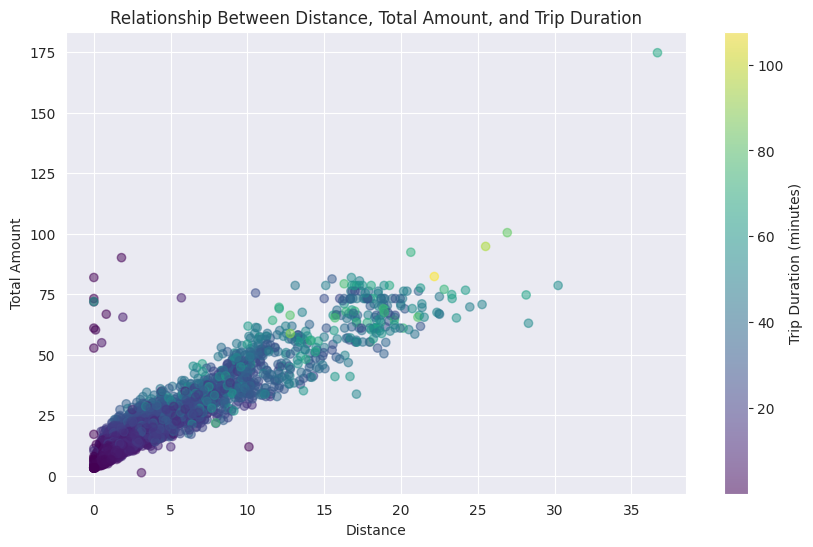

In [41]:
distance = df['distance']
total_amount = df['total']
trip_duration_minutes = df['trip_duration_minutes']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(distance, total_amount, c=trip_duration_minutes, cmap='viridis', alpha=0.5)
plt.colorbar(label='Trip Duration (minutes)')
plt.xlabel('Distance')
plt.ylabel('Total Amount')
plt.title('Relationship Between Distance, Total Amount, and Trip Duration')
plt.grid(True)
plt.show()

## Trip Durations Between Weekdays and Weekends

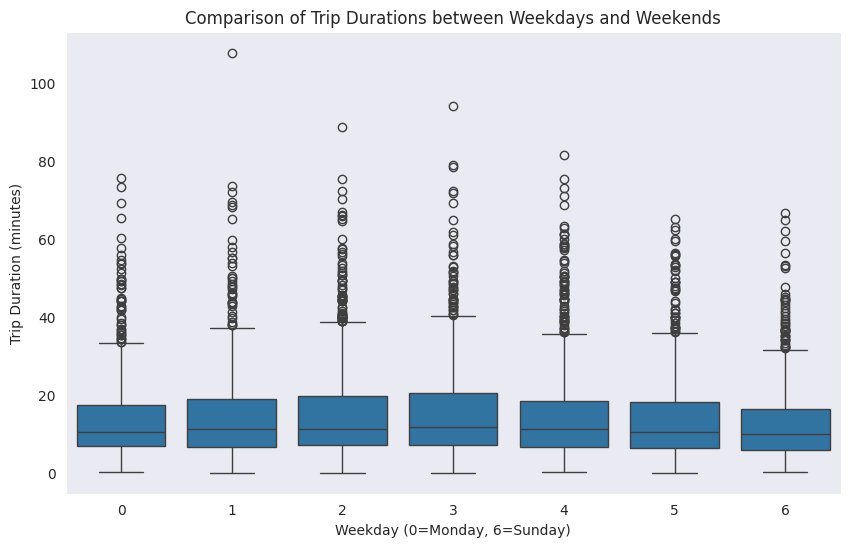

In [42]:
df['weekday'] = df['pickup'].dt.weekday

plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='trip_duration_minutes', data=df)
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Comparison of Trip Durations between Weekdays and Weekends')
plt.show()

## Search Trips By Pickup and Dropoff Zone

In [43]:
# Let's check top pickup and dropoff zone
# Top pickup zones
df['pickup_zone'].value_counts().head(10)

Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
Upper East Side North           185
Times Sq/Theatre District       182
Union Sq                        180
Lincoln Square East             176
Murray Hill                     159
Name: pickup_zone, dtype: int64

In [44]:
# Top dropoff zone
df['dropoff_zone'].value_counts().head(10)

Upper East Side North           244
Murray Hill                     217
Midtown Center                  215
Midtown East                    175
Upper East Side South           173
Times Sq/Theatre District       158
Lincoln Square East             154
Clinton East                    151
East Village                    150
Penn Station/Madison Sq West    147
Name: dropoff_zone, dtype: int64

In [45]:
def search_by_zone(pickup_zone: str,
                   dropoff_zone: str,
                   columns: list,
                   sort_by='total',
                   sort_ascending=False
                   ):
  return (df[(df['pickup_zone'] == pickup_zone) & (df['dropoff_zone'] == dropoff_zone)][columns] \
    .sort_values(sort_by, ascending=sort_ascending).reset_index(drop=True))

In [46]:
search_by_zone("Midtown Center", 'Midtown East', ['pickup', 'distance', 'fare', 'tip', 'trip_day', 'total', 'trip_duration_minutes', 'pickup_zone', 'dropoff_zone'])

,pickup,distance,fare,tip,trip_day,total,trip_duration_minutes,pickup_zone,dropoff_zone
0,2019-03-01 14:31:20,1.36,13.0,0.00,1,16.30,20.583333,Midtown Center,Midtown East
1,2019-03-27 10:48:26,0.76,8.0,2.26,27,13.56,11.550000,Midtown Center,Midtown East
2,2019-03-11 18:51:46,0.90,6.0,2.55,11,12.85,6.066667,Midtown Center,Midtown East
3,2019-03-01 14:39:19,0.72,7.5,1.00,1,11.80,9.983333,Midtown Center,Midtown East
4,2019-03-22 01:01:00,1.12,6.0,1.96,22,11.76,5.566667,Midtown Center,Midtown East
5,2019-03-17 10:02:59,0.77,6.5,1.96,17,11.76,7.250000,Midtown Center,Midtown East
6,2019-03-29 06:26:22,1.10,6.5,1.96,29,11.76,6.866667,Midtown Center,Midtown East
7,2019-03-18 16:18:58,0.80,6.0,0.00,18,10.30,7.100000,Midtown Center,Midtown East
8,2019-03-04 14:17:58,0.70,5.0,1.65,4,9.95,4.333333,Midtown Center,Midtown East


## Fare / Distance

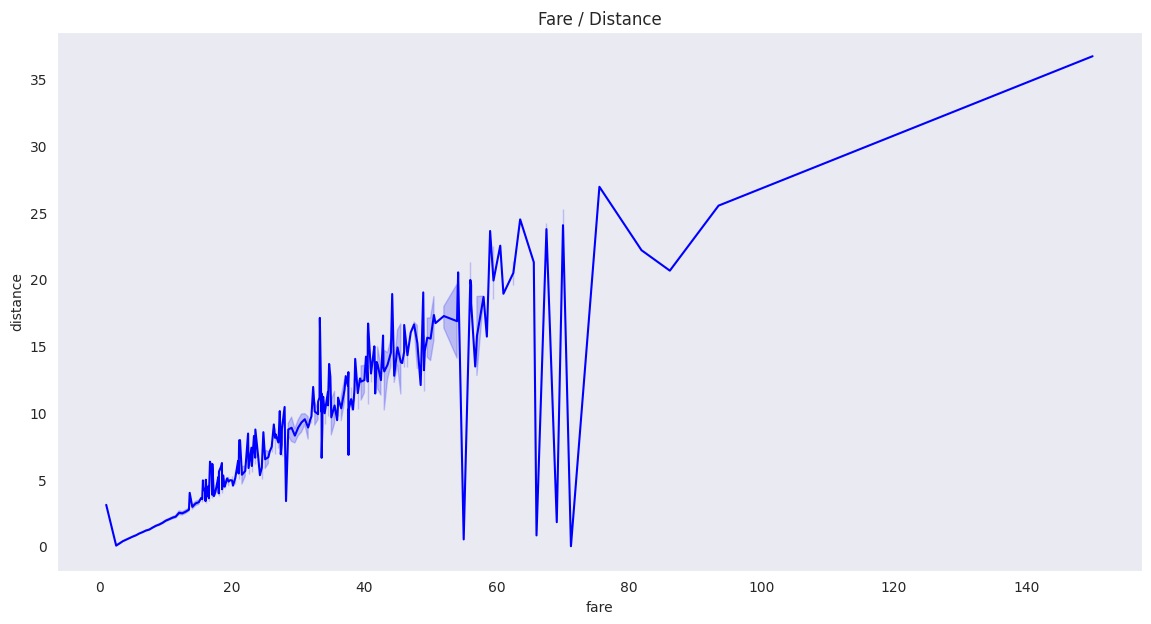

In [47]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, y='distance', x='fare', color="blue")
plt.title("Fare / Distance")
plt.show()

## Hourly Demand

In [48]:
hourly_demand = df.groupby(df['pickup'].dt.hour).size().to_frame()
hourly_demand

,0
pickup,
0,198
1,109
2,97
3,65
4,55
5,50
6,134
7,217
8,312


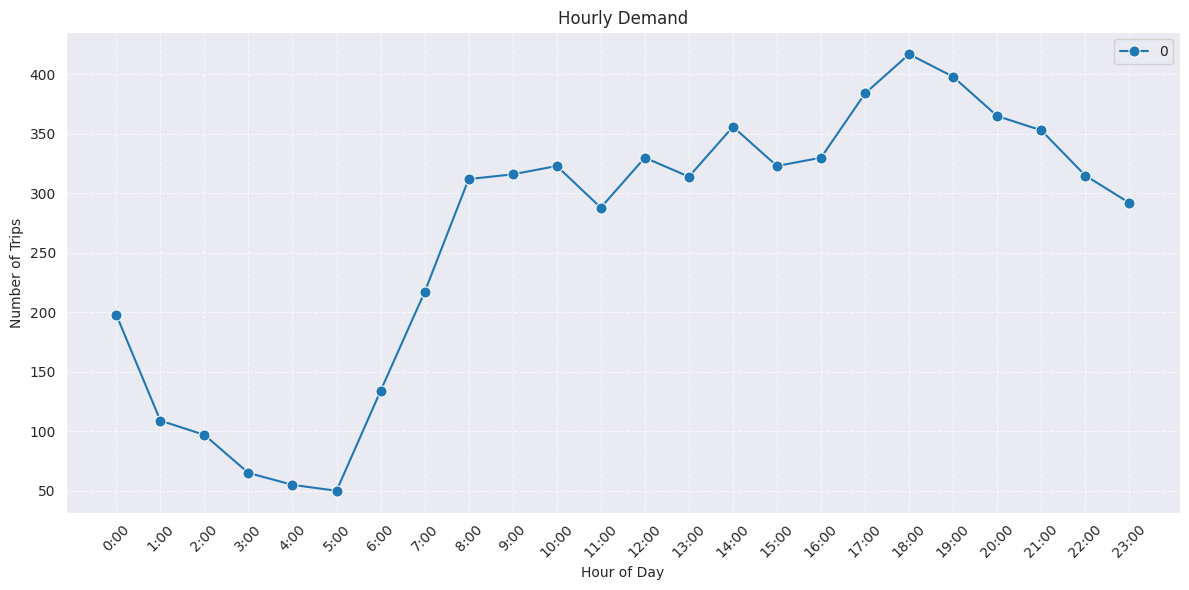

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_demand, color='blue', marker='o', markersize=8, linestyle='-')
plt.title("Hourly Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24), [f'{hour}:00' for hour in range(24)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Daily Demands

In [50]:
daily_demands = df.groupby('trip_day').size().to_frame()
daily_demands

,0
trip_day,
1,236
2,194
3,167
4,170
5,228
6,255
7,217
8,229
9,199


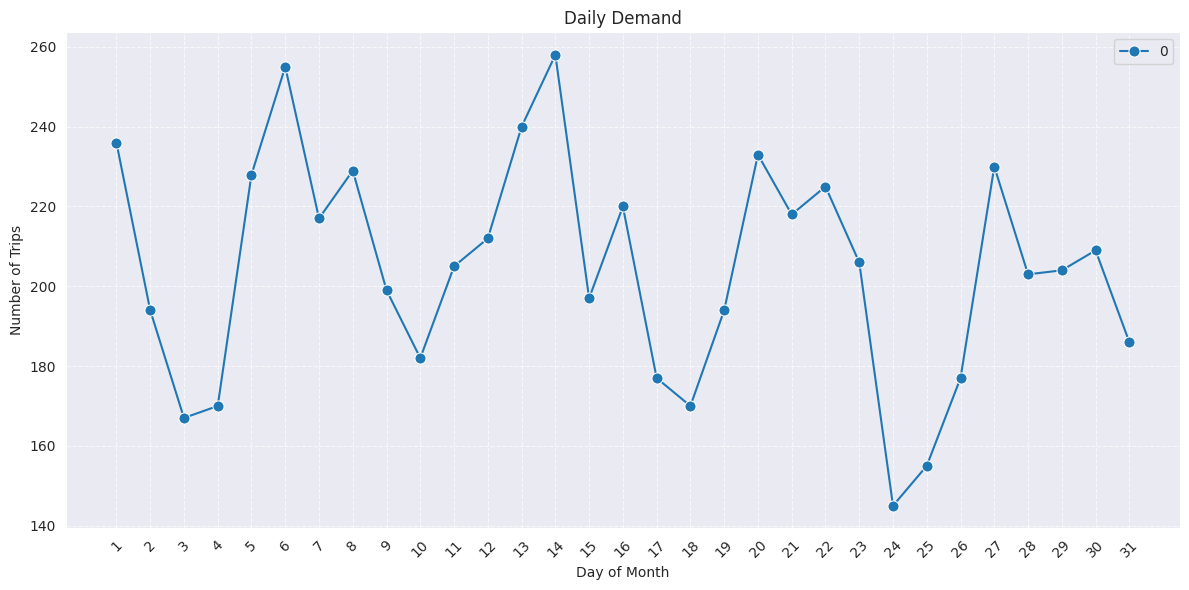

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_demands, color='blue', marker='o', markersize=8, linestyle='-')
plt.title("Daily Demand")
plt.xlabel("Day of Month")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 32), [f'{day}' for day in range(1, 32)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribution of Pickup Zone

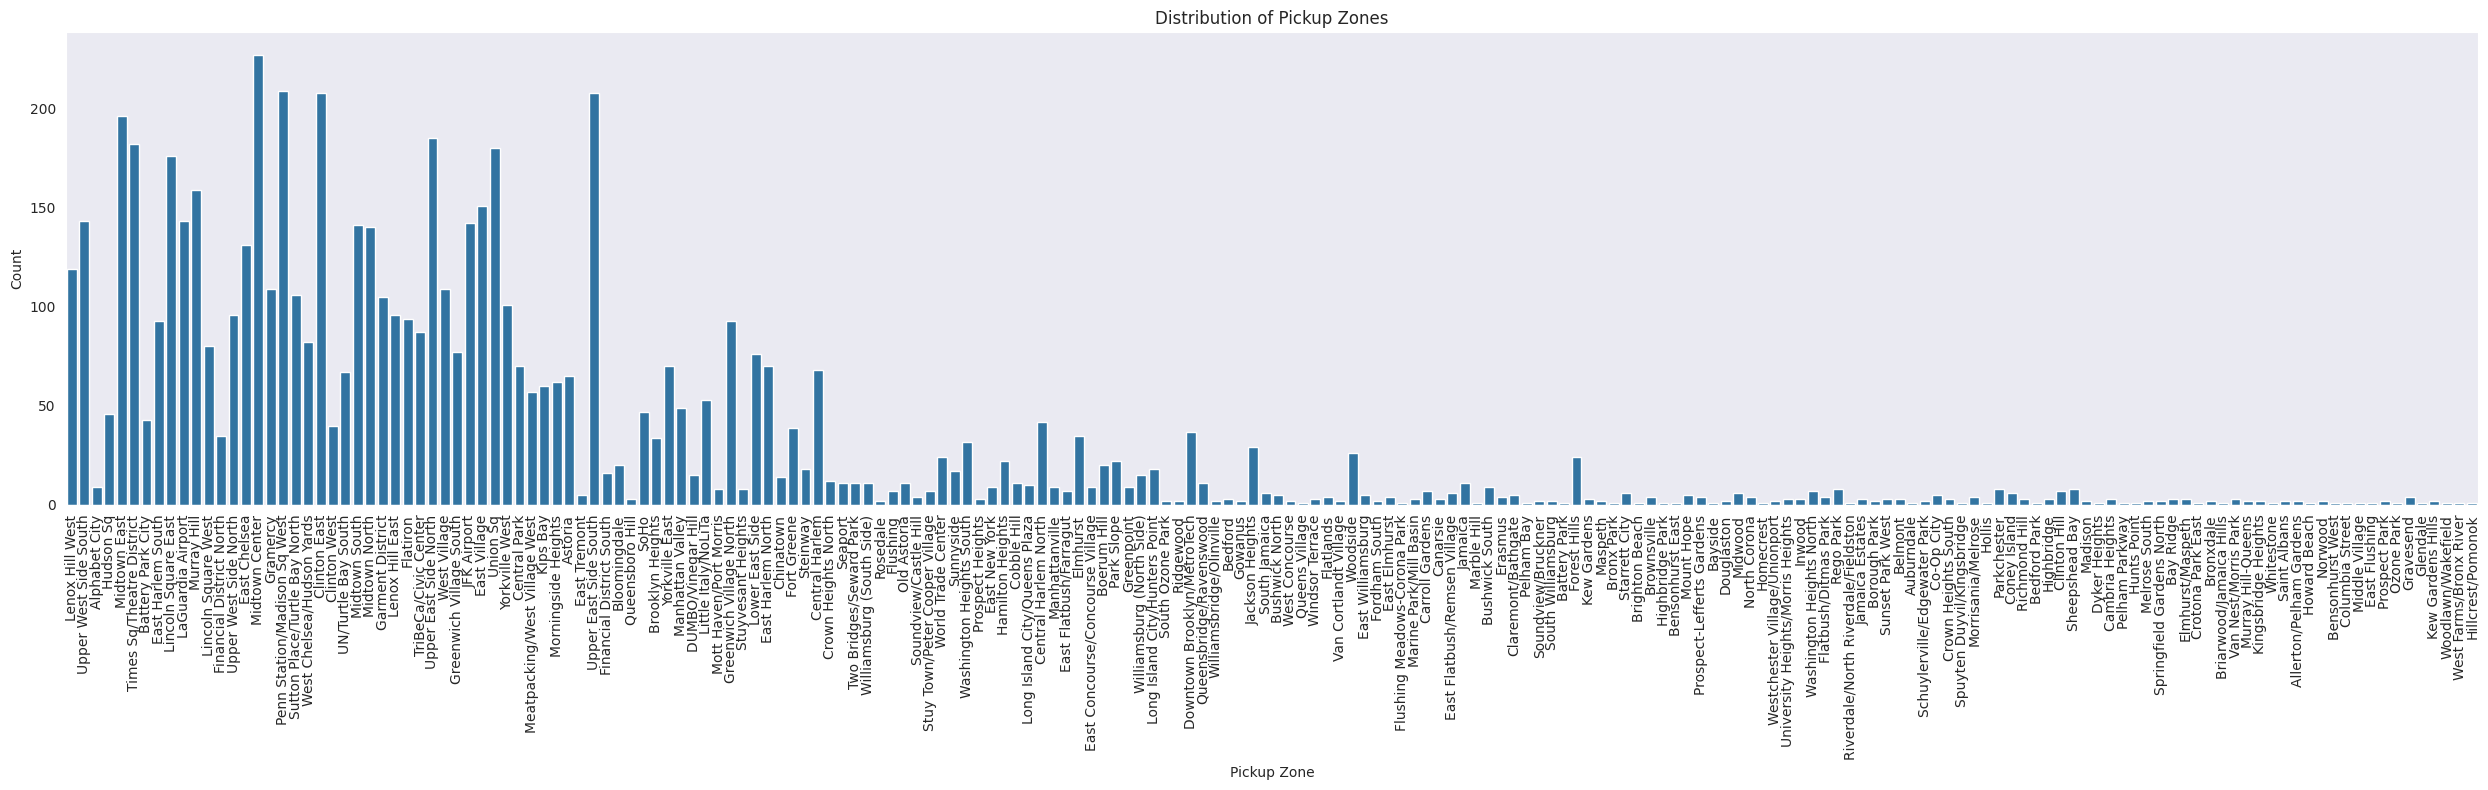

In [52]:
plt.figure(figsize=(25, 8))
sns.countplot(x='pickup_zone', data=df)
plt.title('Distribution of Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Distribution Of Dropoff Zone

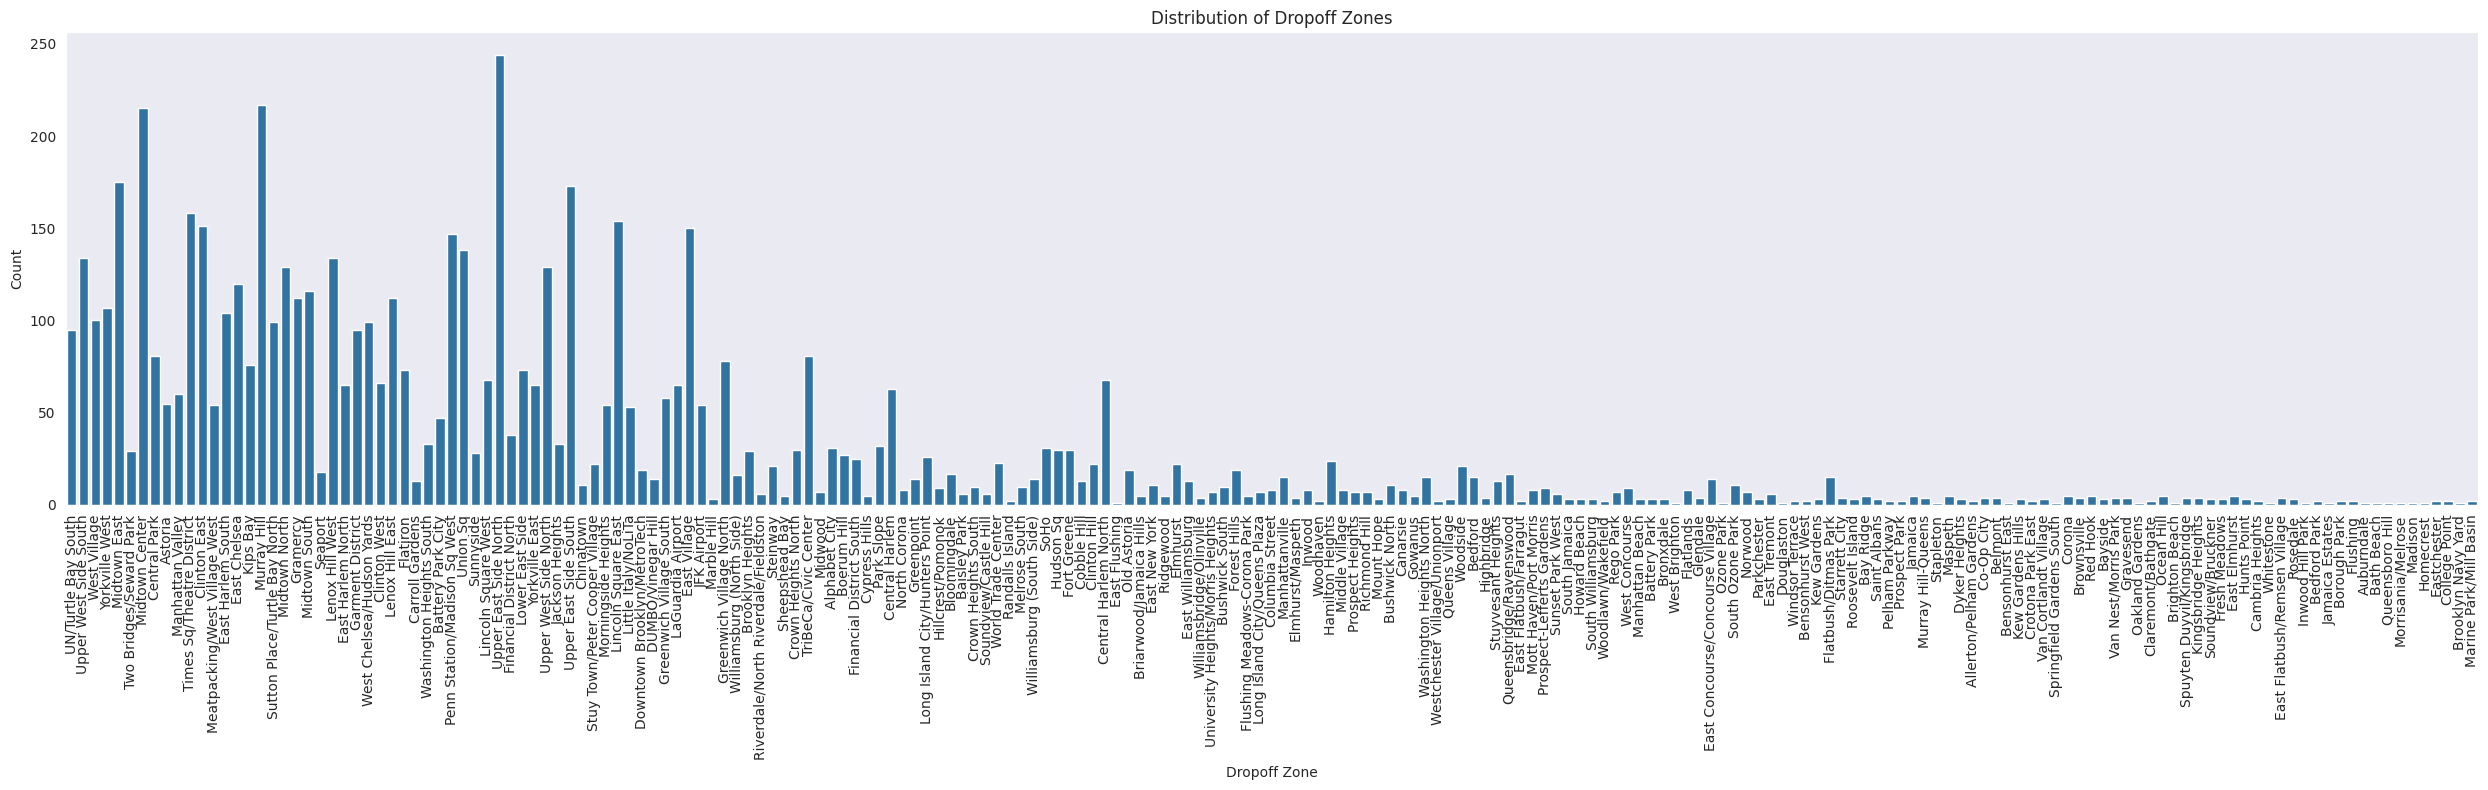

In [53]:
plt.figure(figsize=(25, 8))
sns.countplot(x='dropoff_zone', data=df)
plt.title('Distribution of Dropoff Zones')
plt.xlabel('Dropoff Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Most Visited Borough

In [54]:
regions_df = df['dropoff_borough'].value_counts().sort_values(ascending=False).head(5)
regions_df

Manhattan        5172
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: dropoff_borough, dtype: int64

<ipython-input-55-361107ff1bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions_df.index, y=regions_df,  palette='Set1')


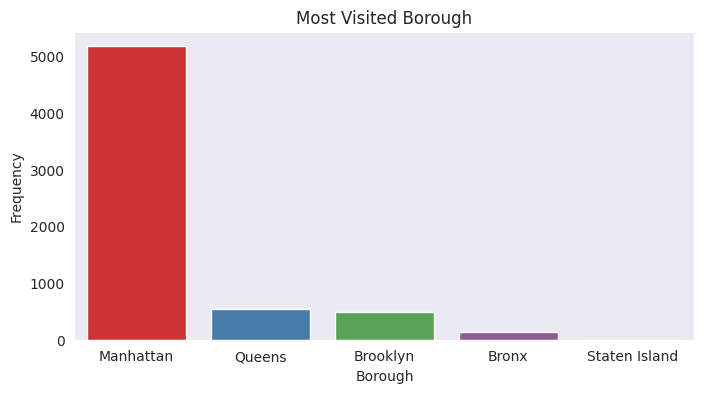

In [55]:
plt.figure(figsize=(8, 4))
sns.barplot(x=regions_df.index, y=regions_df,  palette='Set1')
plt.title("Most Visited Borough")
plt.xlabel("Borough")
plt.ylabel("Frequency")
plt.show()

## Taxi's Color

<ipython-input-56-abc0df107845>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['color'].value_counts().index, y=df['color'].value_counts(), palette='Set1')


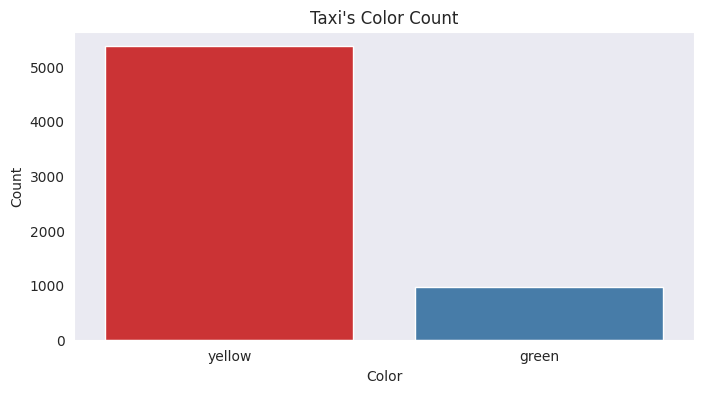

In [56]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['color'].value_counts().index, y=df['color'].value_counts(), palette='Set1')
plt.title("Taxi's Color Count")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

## Pickup Zone Barplot

In [57]:
pickup_df = df['pickup_zone'].value_counts().sort_values(ascending=False).head(10)
pickup_df

Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
Upper East Side North           185
Times Sq/Theatre District       182
Union Sq                        180
Lincoln Square East             176
Murray Hill                     159
Name: pickup_zone, dtype: int64

<ipython-input-58-b9bfb0be86de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_df.index, y=pickup_df, palette='Set1')


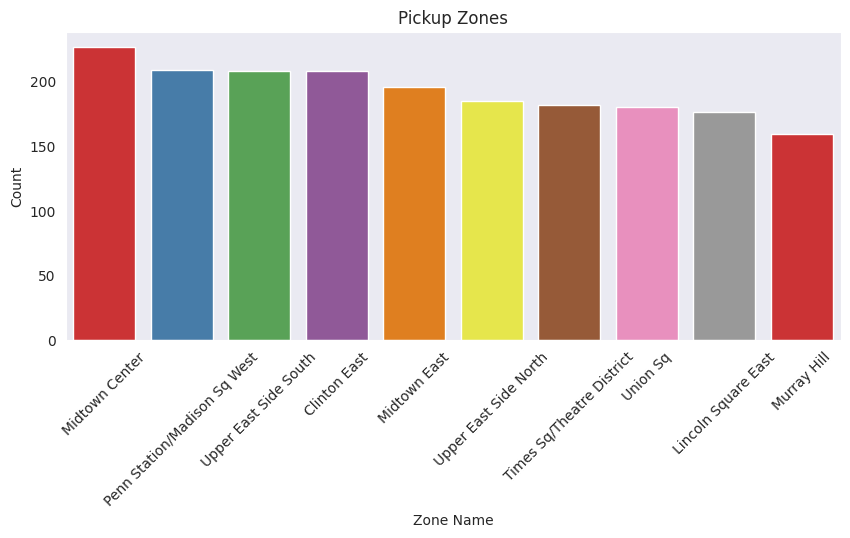

In [58]:
plt.figure(figsize=(10, 4))
sns.barplot(x=pickup_df.index, y=pickup_df, palette='Set1')
plt.title("Pickup Zones")
plt.xlabel("Zone Name")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Dropoff Zone's Barplot

In [59]:
dropoff_df = df['dropoff_zone'].value_counts().sort_values(ascending=False).head(10)
dropoff_df

Upper East Side North           244
Murray Hill                     217
Midtown Center                  215
Midtown East                    175
Upper East Side South           173
Times Sq/Theatre District       158
Lincoln Square East             154
Clinton East                    151
East Village                    150
Penn Station/Madison Sq West    147
Name: dropoff_zone, dtype: int64

<ipython-input-60-72b81079306e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropoff_df.index, y=dropoff_df,palette='Set1')


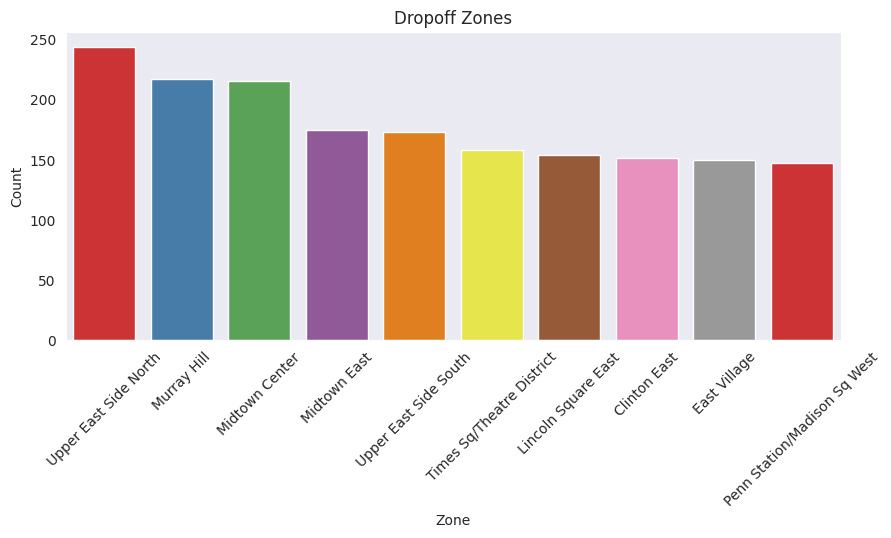

In [60]:
plt.figure(figsize=(10, 4))
sns.barplot(x=dropoff_df.index, y=dropoff_df,palette='Set1')
plt.title("Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Top 10 Average Distance By Dropoff and Pickup Zones

In [61]:
pickup_dropoff_df = df.groupby(['pickup_zone', 'dropoff_zone'])[[ 'distance']].mean()
pickup_dropoff_df = pickup_dropoff_df.nlargest(10, 'distance')
pickup_dropoff_df

,,distance
pickup_zone,dropoff_zone,
JFK Airport,Meatpacking/West Village West,30.230
World Trade Center,JFK Airport,28.300
Financial District North,JFK Airport,28.150
Sunset Park West,Saint Albans,25.510
East Harlem North,Brooklyn Heights,25.280
Starrett City,Washington Heights North,24.480
JFK Airport,Riverdale/North Riverdale/Fieldston,24.200
Kingsbridge Heights,Kingsbridge Heights,23.610
JFK Airport,Mount Hope,23.300


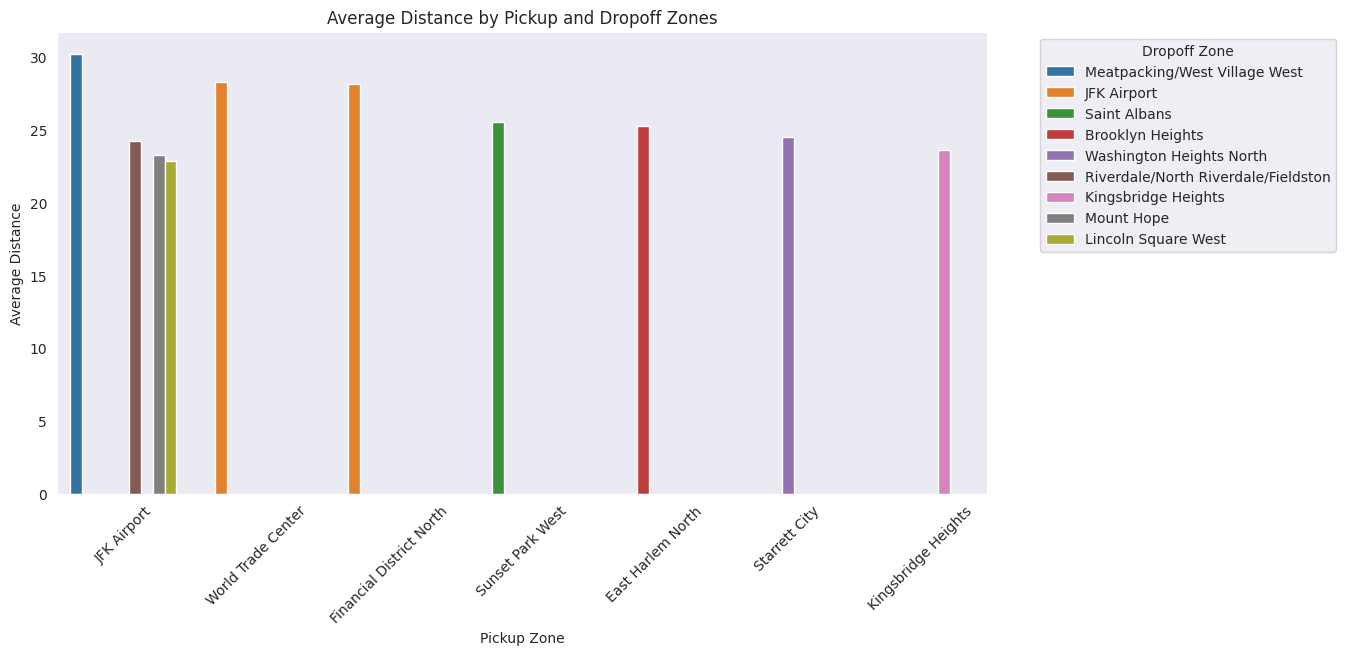

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_zone', y='distance', hue='dropoff_zone', data=pickup_dropoff_df)
plt.title('Average Distance by Pickup and Dropoff Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Top 10 Average Cost by Pickup and Dropoff Zone

In [63]:
cost_pickup_dropoff_df = df.groupby(['pickup_zone', 'dropoff_zone'])[['total']].mean()
cost_pickup_dropoff_df = cost_pickup_dropoff_df.nlargest(10, 'total')
cost_pickup_dropoff_df

total
pickup_zone                       dropoff_zone                         
Sunset Park West                  Saint Albans                   94.800
Coney Island                      Upper East Side North          92.400
University Heights/Morris Heights Yorkville East                 82.360
TriBeCa/Civic Center              West Brighton                  81.350
JFK Airport                       Cobble Hill                    79.145
                                  Meatpacking/West Village West  78.670
South Jamaica                     Flushing Meadows-Corona Park   78.670
Clinton West                      JFK Airport                    78.660
JFK Airport                       Lenox Hill West                78.660
Cambria Heights                   Morningside Heights            77.610

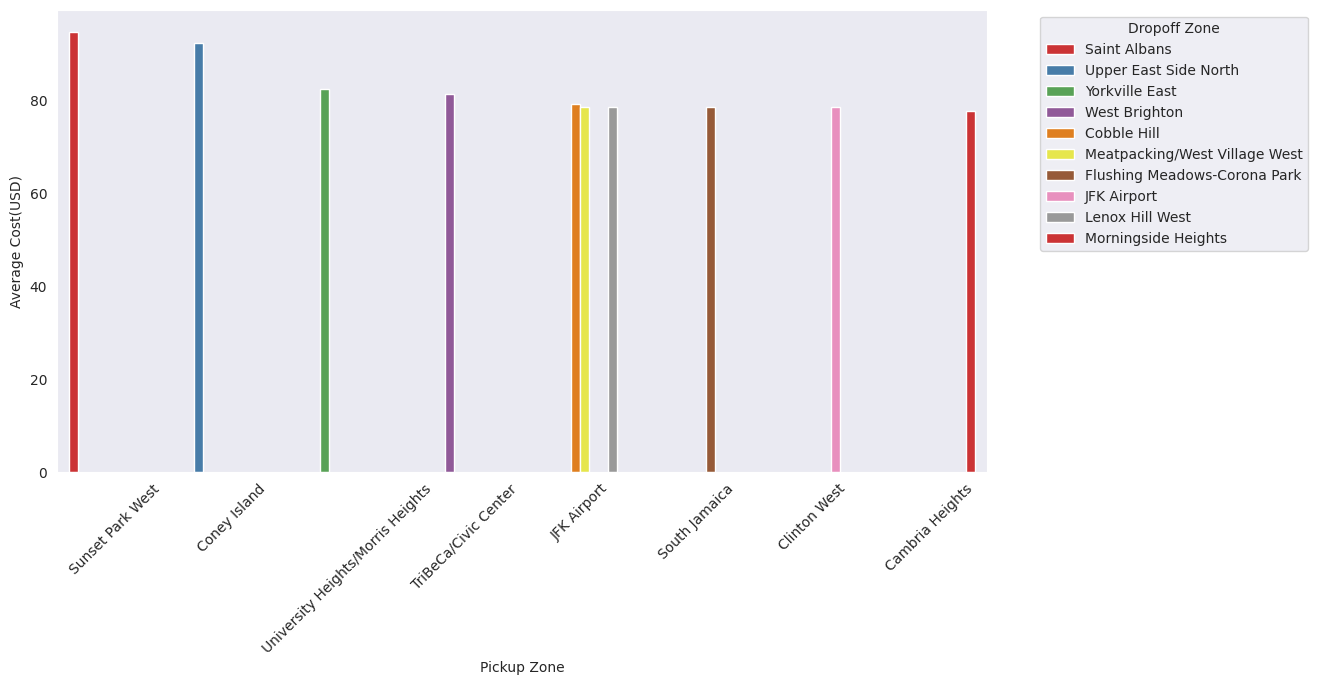

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_zone', y='total', hue='dropoff_zone', data=cost_pickup_dropoff_df, palette='Set1')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Cost(USD)')
plt.xticks(rotation=45)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Correlation Heatmap

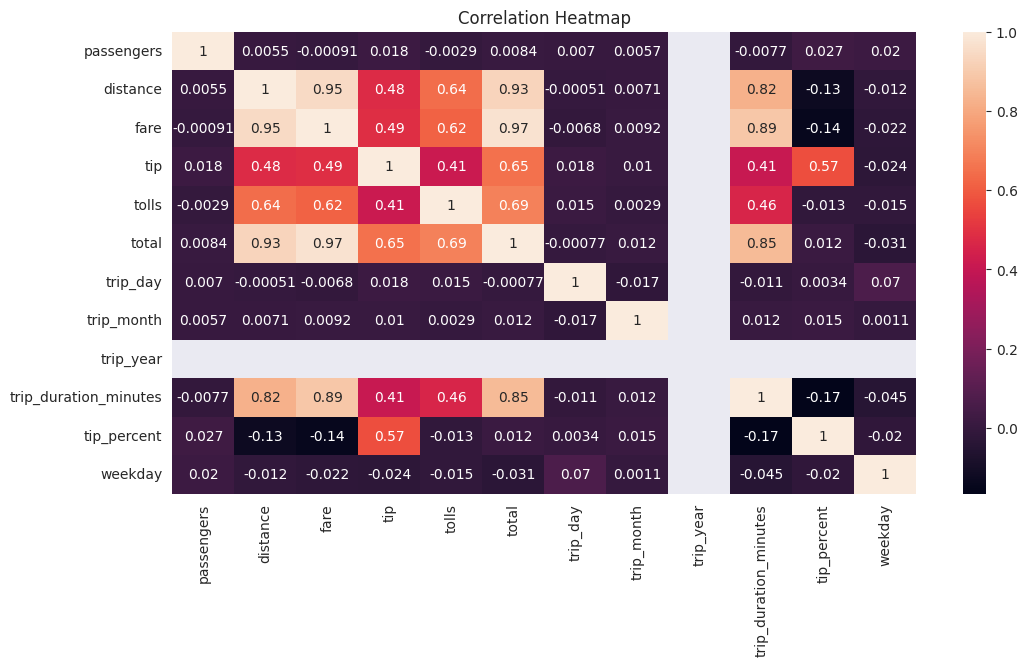

In [65]:
# Correlation
df_corr = df.corr(numeric_only=True)
# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_corr, annot=True, fmt='.2g')
plt.title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.show()

## Regression Plot

In [66]:
def plot_regplot(x, y, data=df, title=None, xlabel=None, ylabel=None):

    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

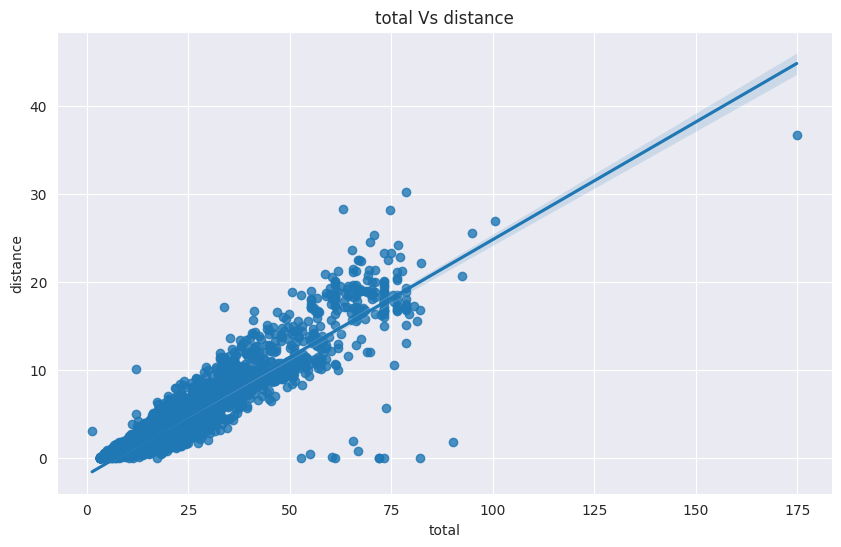

In [67]:
plot_regplot('total', 'distance', data=df, title="total Vs distance", xlabel='total', ylabel='distance')

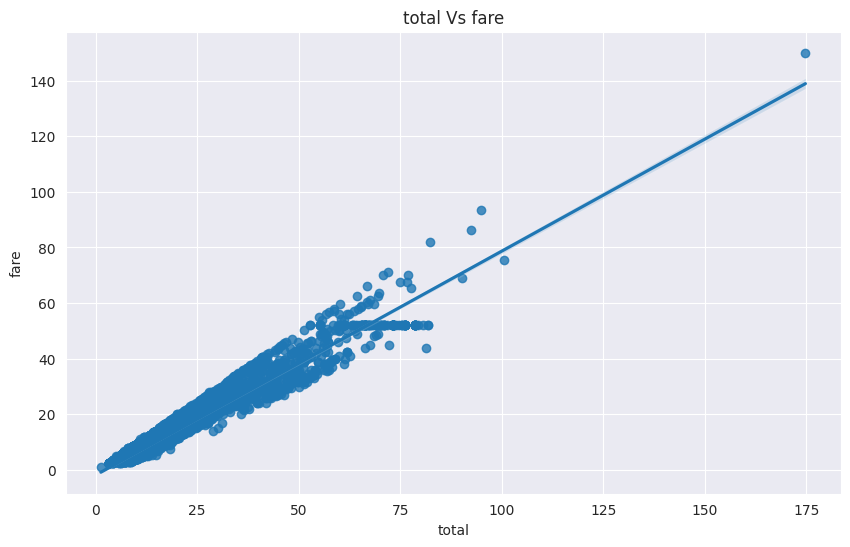

In [68]:
plot_regplot('total', 'fare', data=df, title="total Vs fare", xlabel='total', ylabel='fare')

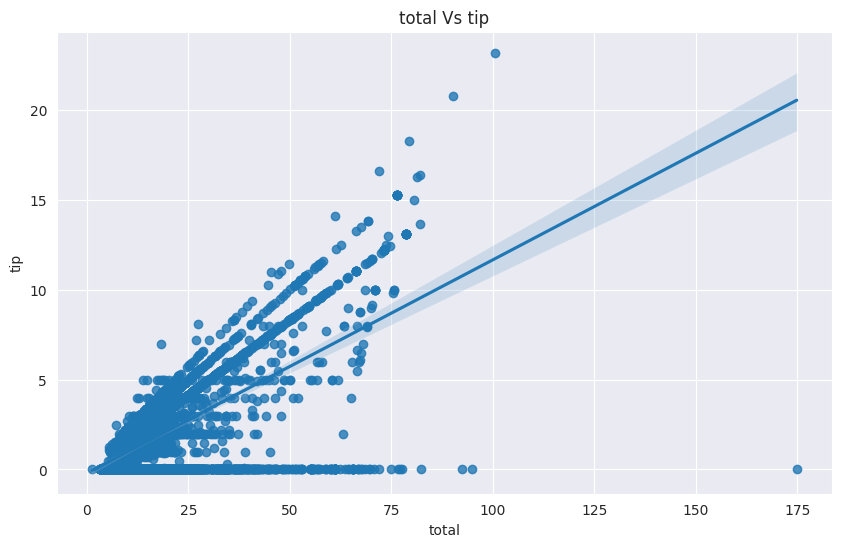

In [69]:
plot_regplot('total', 'tip', data=df, title="total Vs tip", xlabel='total', ylabel='tip')

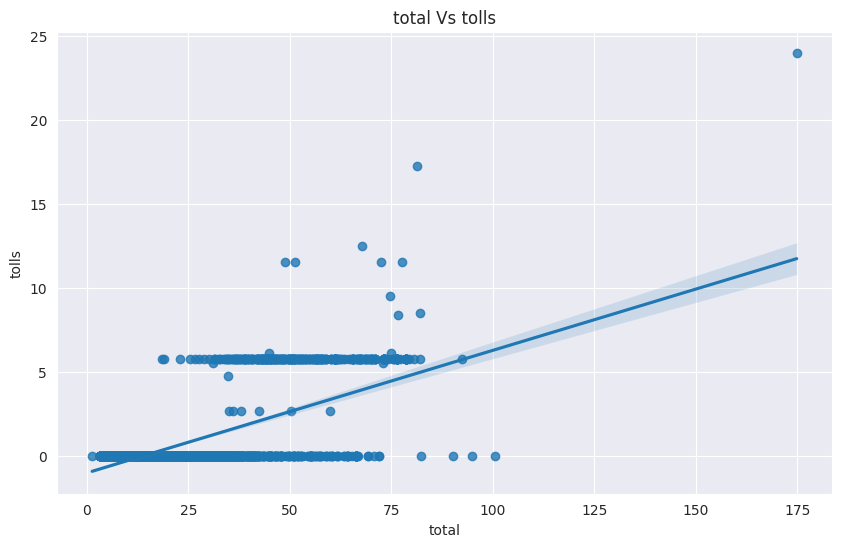

In [70]:
plot_regplot('total', 'tolls', data=df, title="total Vs tolls", xlabel='total', ylabel='tolls')

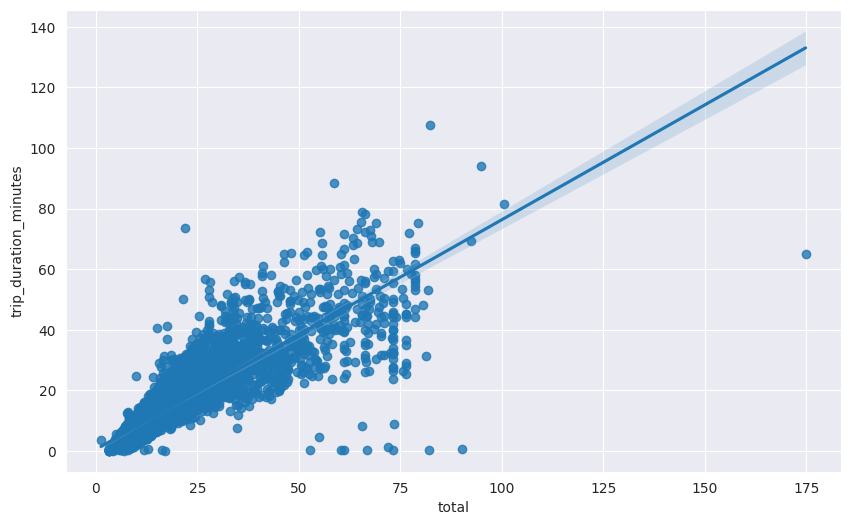

In [71]:
plot_regplot('total', 'trip_duration_minutes', data=df)

In [72]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_day,trip_month,trip_year,trip_duration_minutes,tip_percent,weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,2019,6.250000,30.714286,5
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,3,2019,7.083333,0.000000,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,3,2019,7.400000,31.466667,2
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,3,2019,25.866667,22.777778,6
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,3,2019,9.533333,12.222222,5


# Save Datafram to .csv

In [75]:
df.to_csv('<PATH>', index=False)